In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [3]:
dataset_path = "../data/breakhis"  # relative to notebook folder
categories = ["benign", "malignant"]

print(os.listdir(dataset_path))


['benign', 'malignant']


In [4]:
IMG_SIZE = 128
images = []
labels = []

for category in categories:
    category_path = os.path.join(dataset_path, category)

    for root, dirs, files in os.walk(category_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)

                if img is None:
                    continue

                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

                images.append(img)
                labels.append(category)

images = np.array(images)
labels = np.array(labels)

print("Images loaded:", images.shape)
print("Labels loaded:", labels.shape)

print("Images loaded:", images.shape)
print("Labels loaded:", labels.shape)


Images loaded: (7909, 128, 128, 3)
Labels loaded: (7909,)
Images loaded: (7909, 128, 128, 3)
Labels loaded: (7909,)


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))



Label mapping: {'benign': 0, 'malignant': 1}


In [6]:
print("Folders inside dataset_path:")
print(os.listdir(dataset_path))


Folders inside dataset_path:
['benign', 'malignant']


In [7]:
import os
print(os.listdir("../data"))


['breakhis', 'CBIS-DDSM', 'SIPaKMeD']


In [8]:
import os
print("Current Notebook Directory:", os.getcwd())
print("Files here:", os.listdir())


Current Notebook Directory: c:\Users\tanuu\AarogyaShree\ml\notebook
Files here: ['breakhis_training.ipynb']


In [9]:
import os

print("Benign count:", len(os.listdir("../data/breakhis/benign")))
print("Malignant count:", len(os.listdir("../data/breakhis/malignant")))


Benign count: 7
Malignant count: 7


In [10]:
# Normalize images
images = images / 255.0

# Encode labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (6327, 128, 128, 3)
Test shape: (1582, 128, 128, 3)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolution Block 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [12]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
198/198 [==============================] - 107s 522ms/step - loss: 0.4928 - accuracy: 0.7862 - val_loss: 0.4300 - val_accuracy: 0.8451
Epoch 2/10
198/198 [==============================] - 97s 487ms/step - loss: 0.4495 - accuracy: 0.8186 - val_loss: 0.4099 - val_accuracy: 0.8502
Epoch 3/10
198/198 [==============================] - 104s 528ms/step - loss: 0.4170 - accuracy: 0.8416 - val_loss: 0.4606 - val_accuracy: 0.8458
Epoch 4/10
198/198 [==============================] - 102s 516ms/step - loss: 0.4269 - accuracy: 0.8268 - val_loss: 0.4096 - val_accuracy: 0.8344
Epoch 5/10
198/198 [==============================] - 102s 514ms/step - loss: 0.3820 - accuracy: 0.8517 - val_loss: 0.3530 - val_accuracy: 0.8622
Epoch 6/10
198/198 [==============================] - 99s 501ms/step - loss: 0.3838 - accuracy: 0.8495 - val_loss: 0.4337 - val_accuracy: 0.8167
Epoch 7/10
198/198 [==============================] - 108s 545ms/step - loss: 0.3659 - accuracy: 0.8516 - val_loss: 0.3391 - v

In [13]:
import os

os.makedirs("../models", exist_ok=True)

In [14]:
model.save("../models/breast_cancer_cnn.h5")

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


50/50 [==============================] - 10s 188ms/step - loss: 0.3486 - accuracy: 0.8679
Test Accuracy: 0.8678887486457825
Test Loss: 0.3486248254776001


In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


50/50 [==============================] - 13s 265ms/step - loss: 0.3486 - accuracy: 0.8679
Test Accuracy: 0.8678887486457825
Test Loss: 0.3486248254776001


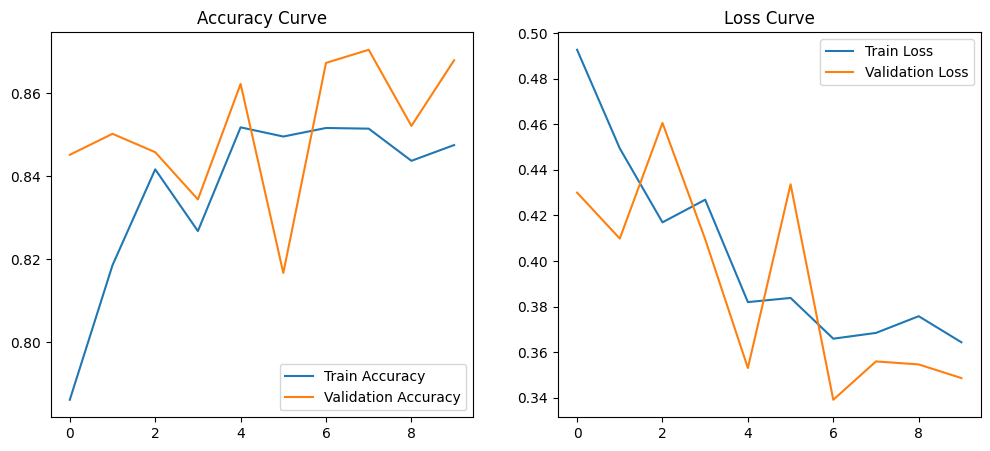

In [17]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Curve")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve")

plt.show()


In [18]:
# Predict probabilities
y_pred = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)

# True labels (already correct)
y_true = y_test



50/50 [==============================] - 21s 408ms/step


50/50 [==============================] - 10s 200ms/step


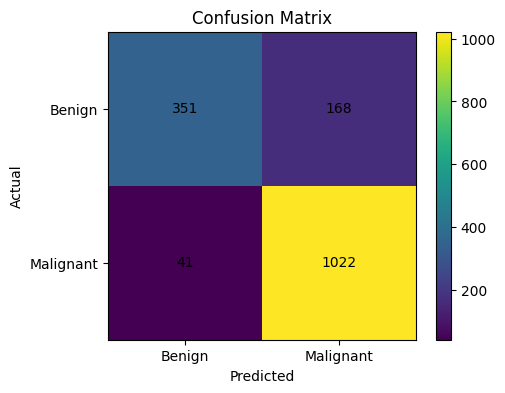

              precision    recall  f1-score   support

      Benign       0.90      0.68      0.77       519
   Malignant       0.86      0.96      0.91      1063

    accuracy                           0.87      1582
   macro avg       0.88      0.82      0.84      1582
weighted avg       0.87      0.87      0.86      1582



In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Predict
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).ravel()

# True labels are already 1D
y_true = y_test

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()

plt.xticks([0,1], ["Benign", "Malignant"])
plt.yticks([0,1], ["Benign", "Malignant"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=["Benign", "Malignant"]))



In [22]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

model = load_model("../models/breast_cancer_cnn.h5")

def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)
    return "Malignant" if pred[0][0] > 0.5 else "Benign"


In [23]:
print(predict_image("../data/breakhis/benign/ANY_IMAGE.png"))


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [24]:
import os

path = "../data/breakhis/benign"
print(os.listdir(path))


['adenosis.stat.txt', 'fibroadenoma.stat.txt', 'phyllodes_tumor.stat.txt', 'process_db_stat.py', 'README_B.txt', 'SOB', 'tubular_adenoma.stat.txt']


In [33]:
os.listdir("../data/breakhis/benign/SOB/adenosis/SOB_B_A_14-22549G")




['100X', '200X', '400X', '40X']

In [34]:
os.listdir("../data/breakhis/benign/SOB/adenosis/SOB_B_A_14-22549G/100X")





['SOB_B_A-14-22549G-100-001.png',
 'SOB_B_A-14-22549G-100-002.png',
 'SOB_B_A-14-22549G-100-003.png',
 'SOB_B_A-14-22549G-100-004.png',
 'SOB_B_A-14-22549G-100-005.png',
 'SOB_B_A-14-22549G-100-006.png',
 'SOB_B_A-14-22549G-100-007.png',
 'SOB_B_A-14-22549G-100-008.png',
 'SOB_B_A-14-22549G-100-009.png',
 'SOB_B_A-14-22549G-100-010.png',
 'SOB_B_A-14-22549G-100-011.png',
 'SOB_B_A-14-22549G-100-012.png',
 'SOB_B_A-14-22549G-100-013.png',
 'SOB_B_A-14-22549G-100-014.png',
 'SOB_B_A-14-22549G-100-015.png',
 'SOB_B_A-14-22549G-100-016.png',
 'SOB_B_A-14-22549G-100-017.png',
 'SOB_B_A-14-22549G-100-018.png',
 'SOB_B_A-14-22549G-100-019.png',
 'SOB_B_A-14-22549G-100-020.png',
 'SOB_B_A-14-22549G-100-021.png',
 'SOB_B_A-14-22549G-100-022.png',
 'SOB_B_A-14-22549G-100-023.png',
 'SOB_B_A-14-22549G-100-024.png',
 'SOB_B_A-14-22549G-100-025.png',
 'SOB_B_A-14-22549G-100-026.png',
 'SOB_B_A-14-22549G-100-027.png',
 'SOB_B_A-14-22549G-100-028.png',
 'SOB_B_A-14-22549G-100-029.png',
 'SOB_B_A-14-2

In [35]:
img_path = "../data/breakhis/benign/SOB/adenosis/SOB_B_A_14-22549G/100X/SOB_B_A-14-22549G-100-001.png"
print(predict_image(img_path))



1/1 [==============================] - 0s 180ms/step
Benign


In [37]:
import os

def get_any_image(folder):
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(".png"):
                return os.path.join(root, file)

img_path = get_any_image("../data/breakhis/benign")
print(img_path)
print(predict_image(img_path))



../data/breakhis/benign\SOB\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-001.png
1/1 [==============================] - 0s 45ms/step
Benign
